### 1.
- One random point
- 2D plane

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [3]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 1.81684637 17.04038272]
 [ 1.57823276 10.93054149]]
[-0.2386136  -6.10984123]


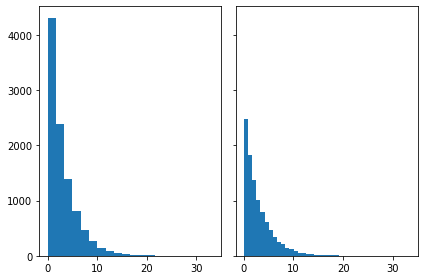

In [4]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [5]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [6]:
gamma_coeff = generate_gamma()

In [7]:
# Generates new point on line between two initial points
def generate_new_point(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [8]:
generated_point = generate_new_point(two_points[0], v, gamma_coeff)

In [9]:
# For visualazion:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[ 1.81684637, 17.04038272],
       [ 1.57823276, 10.93054149],
       [ 1.79224818, 16.4105316 ]])

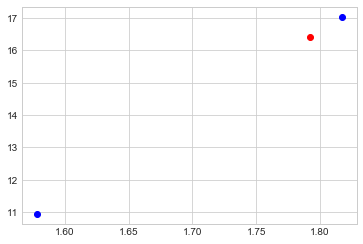

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [11]:
NUM_RAND_POINTS = 20

In [12]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 4.94394473 12.38166747]
 [ 7.1355999  17.06432951]]
[2.19165517 4.68266204]


In [13]:
gamma_coeff = generate_gamma()

generated_points = generate_new_point(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_new_point(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

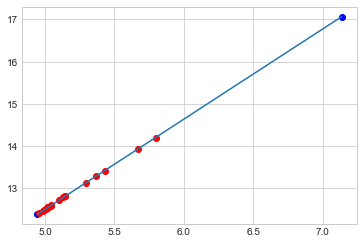

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [15]:
generated_points

array([[ 5.1009095 , 12.71703638],
       [ 4.95924507, 12.41435798],
       [ 5.02068702, 12.54563406],
       [ 5.00855161, 12.5197057 ],
       [ 5.43002828, 13.42022728],
       [ 4.99339324, 12.48731853],
       [ 5.67335853, 13.94012356],
       [ 5.03995482, 12.58680139],
       [ 5.79623119, 14.20265169],
       [ 5.01484061, 12.5331427 ],
       [ 5.14764351, 12.81688764],
       [ 5.14437944, 12.80991368],
       [ 5.2947047 , 13.13109668],
       [ 5.13186154, 12.78316809],
       [ 5.02097623, 12.54625198],
       [ 5.01393879, 12.53121589],
       [ 5.02236287, 12.54921467],
       [ 5.04621079, 12.60016782],
       [ 5.36710901, 13.28579479],
       [ 4.98577302, 12.47103726]])

In [16]:
two_points

array([[ 4.94394473, 12.38166747],
       [ 7.1355999 , 17.06432951]])

## 3.
- One Random point
- n dimentional space

In [17]:
# Generates n random points in hypercube [xy_min; xy_max]
def generate_random_point_nd(num_points=2, n=10, min_=0, max_=10):
    xy_min = [min_] * n
    xy_max = [max_] * n
    data = np.random.uniform(low=xy_min, high=xy_max, size=(num_points, n))
    return data

In [18]:
two_points_nd = generate_random_point_nd(num_points=2, n=10)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == 10
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[3.28842977 6.7957486  7.18071651 3.02107188 9.6410012  1.73366321
  3.57813937 3.57323862 3.21474455 8.11833033]
 [0.96278214 1.36600065 1.85503354 7.9871521  1.43594474 2.42971634
  4.56052065 8.14436253 1.62388631 9.39383718]]
[-2.32564764 -5.42974795 -5.32568297  4.96608022 -8.20505647  0.69605313
  0.98238128  4.57112391 -1.59085824  1.27550685]


In [19]:
gamma_coeff = generate_gamma()

In [20]:
generated_point = generate_new_point(two_points_nd[0], v, gamma_coeff)
generated_point

array([2.84683213, 5.76473948, 6.16946742, 3.96403904, 8.08301212,
       1.86583088, 3.76467548, 4.44121085, 2.91266988, 8.36052558])

In [21]:
def test_points_on_line(p1, p2, list_p3, tol=0.0001):
    # Consider that point in n-d is (vec)x = (vec)x_0 + (vec)k * (vec) t
    # Suppose that (vec)x_0 is p1
    if len(list_p3.shape) == 1:
        list_p3 = list_p3[np.newaxis, :]
    k_vec = p2 - p1
    for p3 in list_p3:
        vec_t = (p3 - p1) / k_vec 
        if  not all(abs(temp - vec_t[0]) < tol for temp in vec_t):
            return False
    return True

In [22]:
# Testing
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_point)

## 3.
- Multiple Random points
- n dimentional space

In [23]:
NUM_RAND_POINTS = 20
N_FEATURES = 10

In [24]:
two_points_nd = generate_random_point_nd(num_points=2, n=N_FEATURES)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == N_FEATURES
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[3.76235224 9.00406499 7.46580237 5.3973775  1.18969044 9.01297557
  3.11321105 3.00177715 2.33548216 8.53108245]
 [0.33415112 3.54849501 8.17916256 7.87835627 0.44658338 6.51136393
  7.43541968 1.37173413 6.31018115 9.58883635]]
[-3.42820111 -5.45556998  0.71336019  2.48097877 -0.74310706 -2.50161164
  4.32220863 -1.63004302  3.97469899  1.05775389]


In [25]:
gamma_coeff = generate_gamma()

generated_points = generate_new_point(two_points_nd[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_new_point(two_points_nd[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)
    
assert generated_points.shape[0] == NUM_RAND_POINTS
assert generated_points.shape[1] == N_FEATURES

In [26]:
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_points)